In [5]:
import numpy as np
import matplotlib.pyplot as plt

class StochasticInterestRateModel:

    """
    A class to simulate and calibrate a stochastic interest rate model using the Euler-Maruyama method.
    
    Attributes:
        mu (float): Drift parameter of the interest rate model.
        sigma (float): Volatility parameter of the interest rate model.
        initial_rate (float): Initial interest rate.
    """

    def __init__(self, mu, sigma, initial_rate):

        """
        Initializes the StochasticInterestRateModel with given parameters.
        
        Args:
            mu (float): Drift parameter of the interest rate model.
            sigma (float): Volatility parameter of the interest rate model.
            initial_rate (float): Initial interest rate.
        """

        self.mu = mu
        self.sigma = sigma
        self.initial_rate = initial_rate
    
    def euler_maruyama(self, n_simulations, n_steps, T):

        """
        Simulates interest rate paths using the Euler-Maruyama method.
        
        Args:
            n_simulations (int): Number of Monte Carlo simulations.
            n_steps (int): Number of time steps.
            T (float): Total time period.
        
        Returns:
            np.ndarray: Simulated interest rate paths.
        """

        dt = T / n_steps
        rates = np.zeros((n_simulations, n_steps + 1))
        rates[:, 0] = self.initial_rate
        
        for i in range(n_steps):
            dW = np.random.normal(0, np.sqrt(dt), size=n_simulations)
            rates[:, i + 1] = (1 + self.mu * dt + self.sigma * np.sqrt(dt) * dW) * rates[:, i]
        
        return rates
    
    def plot_paths(self, rates, T):
         
        """
        Plots the simulated interest rate paths.
        
        Args:
            rates (np.ndarray): Simulated interest rate paths.
            T (float): Total time period.
        """
         
        n_simulations = rates.shape[0]
        n_steps = rates.shape[1] - 1
        time_grid = np.linspace(0, T, n_steps + 1)
        
        plt.figure(figsize=(12, 6))
        for i in range(n_simulations):
            plt.plot(time_grid, rates[i, :], lw=0.8)
        plt.title('Simulated Interest Rate Paths')
        plt.xlabel('Time')
        plt.ylabel('Interest Rate')
        plt.grid(True)
        plt.show()
    
    def calibrate_to_data(self, historical_data):
        
        """
        Calibrates the model parameters (mu and sigma) to fit historical data.
        
        Args:
            historical_data (np.ndarray): Historical interest rate data.
        """

        log_returns = np.diff(np.log(historical_data))
        self.mu = np.mean(log_returns)
        self.sigma = np.std(log_returns)
        print(f'Calibrated mu: {self.mu}, Calibrated sigma: {self.sigma}')


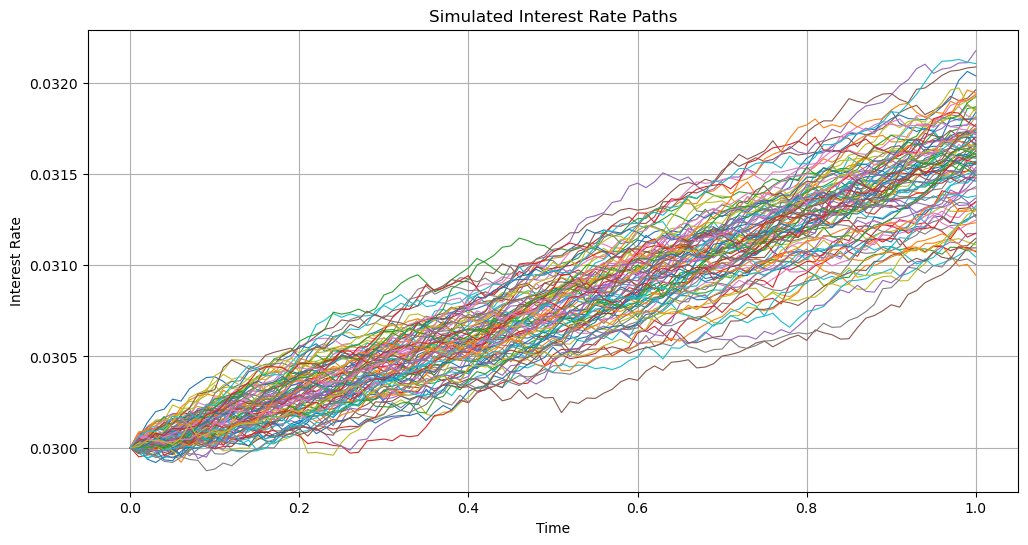

Calibrated mu: 0.029151584940832365, Calibrated sigma: 0.002196291222917248


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def load_historical_data_from_csv(file_path):

    """
    Loads historical interest rate data from a CSV file.
    
    Args:
        file_path (str): Path to the CSV file.
    
    Returns:
        np.ndarray: Historical interest rate data.
    """

    data=np.genfromtxt(file_path, delimiter=',', skip_header=1)
    return data[:, 1]  # Remove the first column because the first one contains the dates


# Initialize the model
mu = 0.05  # Drift parameter
sigma = 0.1  # Volatility parameter
initial_rate = 0.03  # Initial interest rate

model = StochasticInterestRateModel(mu, sigma, initial_rate)

# Parameters for simulation
n_simulations = 100  # Number of Monte Carlo simulations
n_steps = 100  # Number of time steps
T = 1.0  # Total time period

# Perform Euler-Maruyama simulation
simulated_rates = model.euler_maruyama(n_simulations, n_steps, T)

# Plot simulated interest rate paths
model.plot_paths(simulated_rates, T)

# Example start data for calibration
start_data = np.array([0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039])

# Calibrate model to historical data
model.calibrate_to_data(start_data)


In [7]:
# Load example historical data from CSV
file_path = 'spots-monthly.csv'  # Update this path to your actual CSV file path
historical_data = load_historical_data_from_csv(file_path)

# Calibrate model to historical data
model.calibrate_to_data(historical_data)

Calibrated mu: -0.0014728798664041952, Calibrated sigma: 0.023200075066895774
